# Logistics Regression

This regression help us to predict the categorical values. such as if the customer decide to buy it or not / yes or no.

### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()

### Load Data

In [2]:
raw_data = pd.read_csv('/2.01.+Admittance.csv')

In [3]:
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [4]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


### Variable

In [5]:
y = data['Admitted']
x1 = data['SAT']

## Plot Data


### Scatter Plot


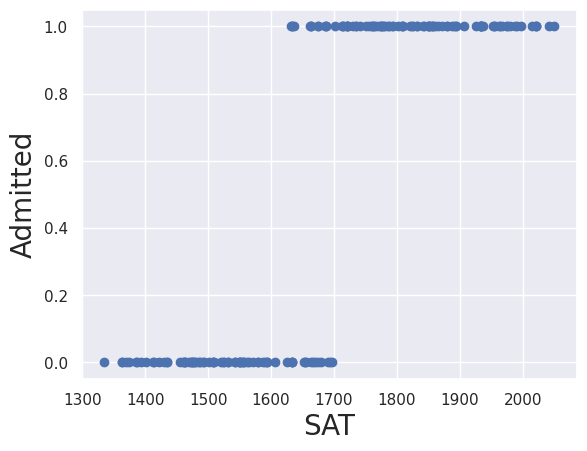

In [6]:
plt.scatter(x1,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()


### Regression Line

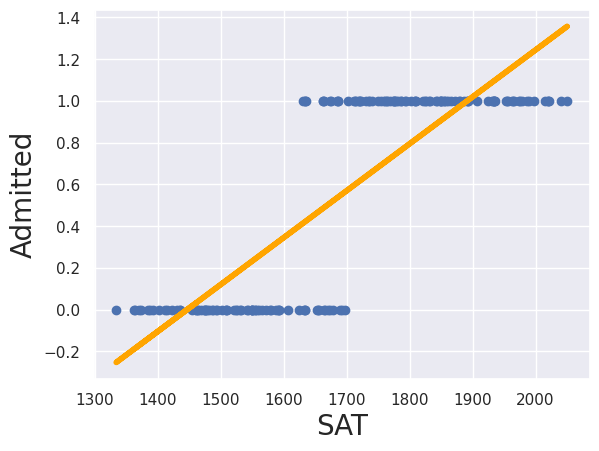

In [7]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y)
yhat = x1 * results_lin.params[1] + results_lin.params[0]

plt.plot(x1, yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Plot with Logistics Regression

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


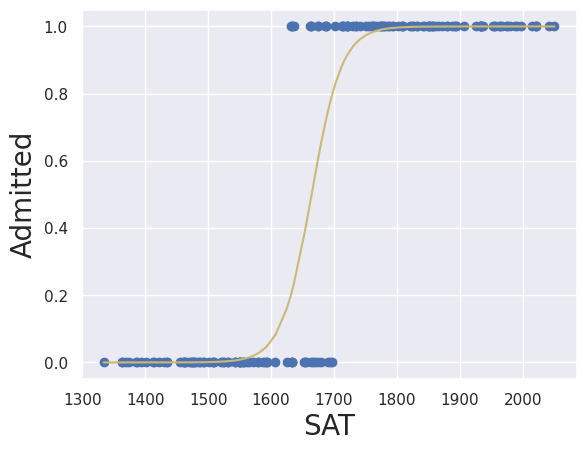

In [8]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x, b0, b1):
    return np.array(np.exp(b0 + b1*x) / (1 + np.exp(b0 + b1*x)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y, color = 'C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted, f_sorted, color = 'C8')
plt.show()